In [31]:
import scipy.special as sc
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt

In [32]:
def activator_no_decay(r_a, t):
    return sc.exp1(r_a**2 / t)

def activator_with_decay(r_a, t, gamma):
    def integrand(u):
        return (1/u) * np.exp(-(r_a**2 / u) - gamma*u)
    result, _ = quad(integrand, 0, t)
    return result

def inhibitor(r, t, t_n, r_n, beta):
    if t <= t_n:
        return 0
    return (beta / (t - t_n)) * np.exp(-(r - r_n)**2 / ((t - t_n) * beta))

def simulate_sprout_positions(gamma, beta, I_thresh, r_lim, t_1, activator_trigger_level, num_sprouts=9, max_time=1.0, time_step=0.001):
    r_n = [0.0]
    t_n = [t_1]
    for _ in range(num_sprouts - 1):
        t = t_n[-1] + time_step
        r = r_n[-1]
        while t < max_time:
            r_a = np.sqrt(1 + r**2)
            if gamma == 0:
                A = activator_no_decay(r_a, t)
            else:
                A = activator_with_decay(r_a, t, gamma)
            I = sum(inhibitor(r, t, t_n[i], r_n[i], beta) for i in range(len(t_n)))
            if A >= activator_trigger_level and I <= I_thresh:
                r_n.append(r)
                t_n.append(t)
                break
            r += 0.001
            if r > r_lim:
                break
            t += time_step
        if r > r_lim:
            break
    return r_n, t_n

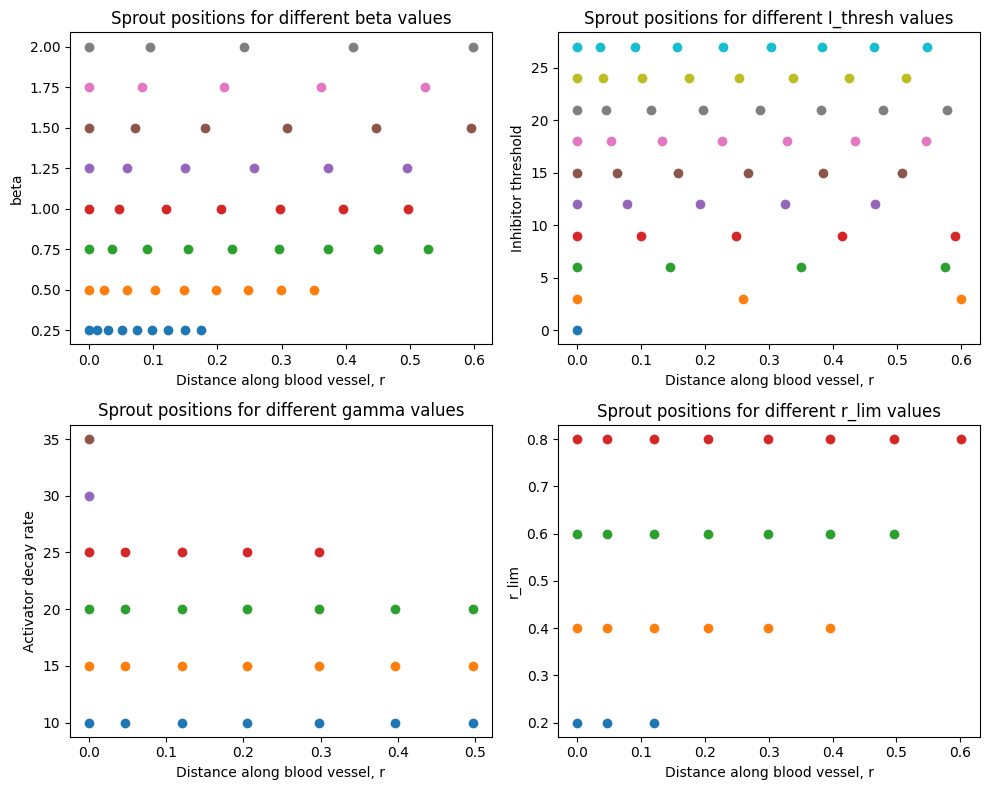

In [34]:
gamma_x = 10
beta_base = 1.0
I_thresh_base = 20.0
r_lim_base = 0.6
t_1_base = 0.30306
activator_trigger_level_base = 2e-5

betas = np.arange(0.25,2.01,0.25)
r_ns_a = []
for beta in betas:
    r_n, _ = simulate_sprout_positions(gamma=gamma_x, beta=beta, I_thresh=I_thresh_base, r_lim=r_lim_base, t_1=t_1_base, activator_trigger_level=activator_trigger_level_base)
    r_ns_a.append(r_n)

I_threshs = np.arange(0,30,3)
r_ns_b = []
for I_thresh in I_threshs:
    r_n, _ = simulate_sprout_positions(gamma=gamma_x, beta=beta_base, I_thresh=I_thresh, r_lim=r_lim_base, t_1=t_1_base, activator_trigger_level=activator_trigger_level_base)
    r_ns_b.append(r_n)

gammas = np.arange(gamma_x,gamma_x*4, gamma_x/2)
r_ns_c = []
for gamma in gammas:
    r_n, _ = simulate_sprout_positions(gamma=gamma, beta=beta_base, I_thresh=I_thresh_base, r_lim=r_lim_base, t_1=t_1_base, activator_trigger_level=activator_trigger_level_base)
    r_ns_c.append(r_n)

r_lims = [0.2, 0.4, 0.6, 0.8]
r_ns_d = []
for r_lim in r_lims:
    r_n, _ = simulate_sprout_positions(gamma=gamma_x, beta=beta_base, I_thresh=I_thresh_base, r_lim=r_lim, t_1=t_1_base, activator_trigger_level=activator_trigger_level_base)
    r_ns_d.append(r_n)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for i, r_n in enumerate(r_ns_a):
    axs[0, 0].plot(r_n, [betas[i]] * len(r_n), "o")
axs[0, 0].set_xlabel("Distance along blood vessel, r")
axs[0, 0].set_ylabel("beta")
axs[0, 0].set_title("Sprout positions for different beta values")
# axs[0, 0].legend()

for i, r_n in enumerate(r_ns_b):
    axs[0, 1].plot(r_n, [I_threshs[i]] * len(r_n), "o")
axs[0, 1].set_xlabel("Distance along blood vessel, r")
axs[0, 1].set_ylabel("Inhibitor threshold")
axs[0, 1].set_title("Sprout positions for different I_thresh values")
# axs[0, 1].legend()

for i, r_n in enumerate(r_ns_c):
    axs[1, 0].plot(r_n, [gammas[i]] * len(r_n), "o")
axs[1, 0].set_xlabel("Distance along blood vessel, r")
axs[1, 0].set_ylabel("Activator decay rate")
axs[1, 0].set_title("Sprout positions for different gamma values")
# axs[1, 0].legend()

for i, r_n in enumerate(r_ns_d):
    axs[1, 1].plot(r_n, [r_lims[i]] * len(r_n), "o")
axs[1, 1].set_xlabel("Distance along blood vessel, r")
axs[1, 1].set_ylabel("r_lim")
axs[1, 1].set_title("Sprout positions for different r_lim values")
# axs[1, 1].legend()

plt.tight_layout()
plt.show()